# Ultimate Technologies Inc. Challenge

Ultimate Technologies Inc. is a transportation network company that has disrupted the taxi and logistics industry and is considered a prestigious company to work for. This challenge has been adapted from an actual Ultimate Inc. data science challenge.

## 1.1 Data Cleaning

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [2]:
file = 'logins.json'
f = open(file)
logins = json.loads(f.read())
f.close()

In [3]:
#inspect keys
logins.keys()

dict_keys(['login_time'])

In [4]:
#how much data
print(len(logins['login_time']))

93142


In [5]:
#create dataframe
df_logins = pd.DataFrame(pd.to_datetime(logins['login_time']),columns=['login_time'])
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [8]:
#check for NaN values
missing_logins = pd.concat([df_logins.isnull().sum(), 100 * df_logins.isnull().mean()], axis=1)
missing_logins.columns=['count','%']
missing_logins.sort_values(by=['%'], ascending=False)

,count,%
login_time,0,0.0


In [10]:
df_logins[df_logins['login_time'].isna()].shape

(0, 1)

In [11]:
#add count column for resample
df_logins['count'] = 1
#set login time as index for resampling
df_logins.index = df_logins['login_time']
#drop redundant column
df_logins.drop('login_time',axis=1,inplace=True)
df_logins.tail()

,count
login_time,
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1
1970-04-13 18:57:38,1
1970-04-13 18:54:23,1


<AxesSubplot:xlabel='login_time'>

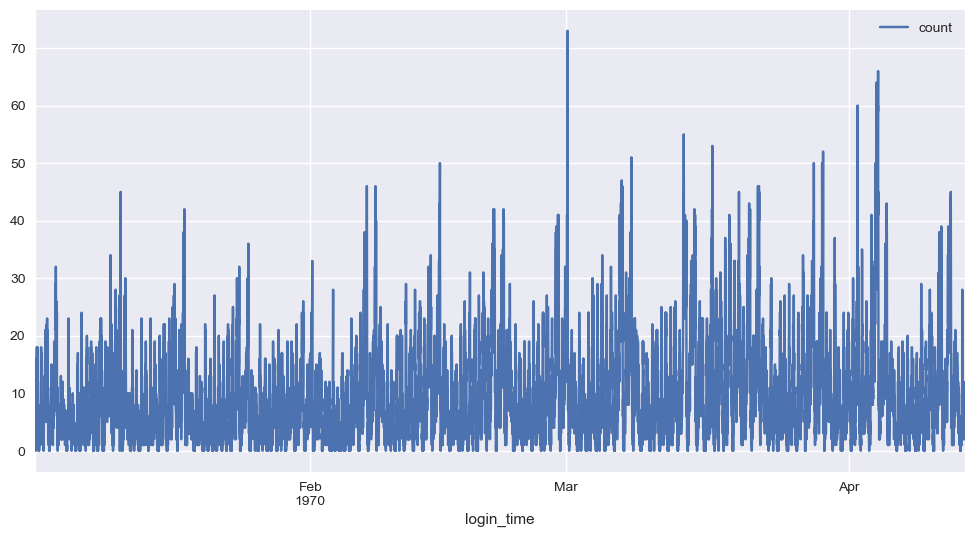

In [20]:
df_count_15 = df_logins.resample('15min').sum()
df_count_15.plot(kind='line',figsize=(12,6))

<AxesSubplot:xlabel='login_time'>

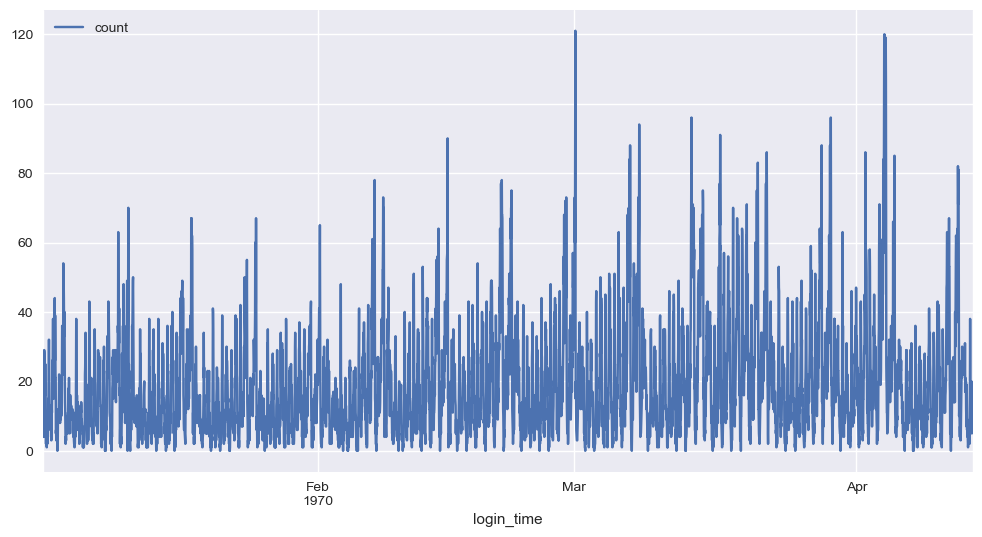

In [21]:
df_count_30 = df_logins.resample('30min').sum()
df_count_30.plot(kind='line',figsize=(12,6))

<AxesSubplot:xlabel='login_time'>

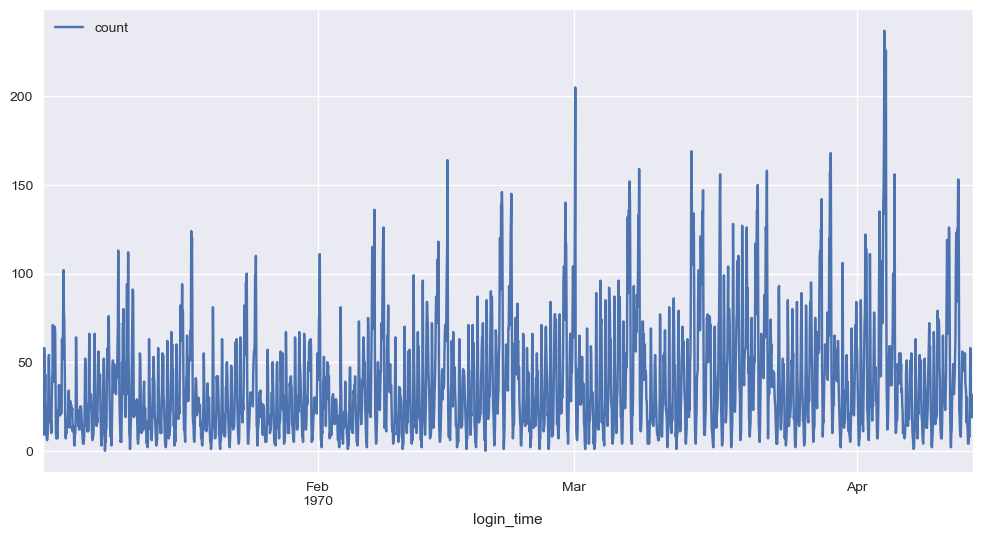

In [22]:
df_count_60 = df_logins.resample('60min').sum()
df_count_60.plot(kind='line',figsize=(12,6))

Plotting the 15, 30 and 60 minute intervals over the 4 month period, we can see a sinusoidal pattern that seems to have an average value that is increasing.

In [23]:
df_count_15.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [24]:
df_count = pd.concat([df_count_15.describe(), df_count_30.describe(), df_count_60.describe()], axis=1)
df_count.columns=['15min','30min', '60min']
df_count

,15min,30min,60min
count,9788.000000,4894.000000,2447.000000
mean,9.515938,19.031876,38.063752
std,8.328818,15.948165,30.752820
min,0.000000,0.000000,0.000000
25%,3.000000,7.000000,15.000000
50%,7.000000,15.000000,29.000000
75%,13.000000,26.000000,52.000000
max,73.000000,121.000000,237.000000


The average number of logins per 15 minutes is 7. The mean is being pulled up by the spikes in our dataset. Let's take a look at the day distributions of the logins.